<a href="https://colab.research.google.com/github/agalvezm/SPLiT-seq_kallisto/blob/main/notebooks_countmatrices/fastq_dump_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GSE134809_

##Metadata

In [ ]:
# define the values for the analysis

# accession id for the data
id = "GSE134809"

samp_id = ["GSM3972009"]

no_samples = 1

fastqs_per_sample = [8] 

sample_id = samp_id

database_id = [id] * no_samples

tissue = ["ileum"] * no_samples

cell_type = ["lamina propria"] * no_samples

condition = ["involved"] * no_samples

species = ["human"] * no_samples

technology = ["10xv1"] * no_samples

paper = ["Sungnak et al. Nature medicine (2020)"] * no_samples

figure = ["Fig 2"] * no_samples


# Set string variables for kb functions

species_kb = species[0]

technology_kb = technology[0]

## fastq-dump

In [ ]:
# Install SRA-toolkit 
!wget "http://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/current/sratoolkit.current-centos_linux64.tar.gz"

! tar -xzf sratoolkit.current-centos_linux64.tar.gz

# Add to path
import os
os.environ['PATH'] += ":/content/sratoolkit.2.10.9-centos_linux64/bin"

# Configure
!vdb-config --interactive

# Import packages

import numpy as np


URL transformed to HTTPS due to an HSTS policy
--2021-01-21 20:49:46--  https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/current/sratoolkit.current-centos_linux64.tar.gz
Resolving ftp-trace.ncbi.nlm.nih.gov (ftp-trace.ncbi.nlm.nih.gov)... 130.14.250.13, 2607:f220:41e:250::10, 2607:f220:41e:250::11, ...
Connecting to ftp-trace.ncbi.nlm.nih.gov (ftp-trace.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99836080 (95M) [application/x-gzip]
Saving to: ‘sratoolkit.current-centos_linux64.tar.gz.3’

sratoolkit.current- 100%[===================>]  95.21M  86.8MB/s    in 1.1s    

2021-01-21 20:49:47 (86.8 MB/s) - ‘sratoolkit.current-centos_linux64.tar.gz.3’ saved [99836080/99836080]

2021-01-21T20:49:50 vdb-config.2.10.9 fatal: SIGNAL - Segmentation fault 


In [ ]:
!$PATH

/bin/bash: /usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin:/content/sratoolkit.2.10.8-centos_linux64/bin:/content/sratoolkit.2.10.8-centos_linux64/bin:/content/sratoolkit.2.10.9-centos_linux64/bin:/content/sratoolkit.2.10.9-centos_linux64/bin: No such file or directory


In [ ]:
# List of SRAs to download and transform. Copy paste from excel as string
SRAs = ""

SRAs = SRAs.split()

# SRA to delete, usually the index file, which get downloaded because we include technical reads. 
# It varies so check in the SRA website
SRA_to_delete = "3"


SRAs_to_keep = np.setdiff1d(["1", "2", "3", "4"], [SRA_to_delete])


In [ ]:
for sra in SRAs:
  """
  Downloads SRAs and transforms to compressed fastq file. Remove index reads and original SRA
  """
  # Download SRA
  !prefetch $sra

  # Convert to fastq. Biological reads are usually considered technicals in 10x so do not skip them.
  fastq_dump_cmd = "fastq-dump -F --gzip --readids --split-files " + sra + "/" + sra +".sra"
  !$fastq_dump_cmd

  #Remove files
  rm_cmd_1 = "rm " + sra + "/" + sra + ".sra"
  rm_cmd_2 = "rm " + sra + "_" + SRA_to_delete + ".fastq.gz" 
  !$rm_cmd_1
  !$rm_cmd_2


2021-01-21T20:51:05 prefetch.2.10.9: 1) Downloading 'SRR9827631'...
2021-01-21T20:51:05 prefetch.2.10.9:  Downloading via HTTPS...
2021-01-21T20:51:09 prefetch.2.10.9:  HTTPS download succeed
2021-01-21T20:51:09 prefetch.2.10.9:  'SRR9827631' is valid
2021-01-21T20:51:09 prefetch.2.10.9: 1) 'SRR9827631' was downloaded successfully
2021-01-21T20:51:09 prefetch.2.10.9: 'SRR9827631' has 0 unresolved dependencies
Read 5690582 spots for SRR9827631/SRR9827631.sra
Written 5690582 spots for SRR9827631/SRR9827631.sra

2021-01-21T20:58:06 prefetch.2.10.9: 1) Downloading 'SRR9827632'...
2021-01-21T20:58:06 prefetch.2.10.9:  Downloading via HTTPS...
2021-01-21T21:02:39 prefetch.2.10.9:  HTTPS download succeed
2021-01-21T21:02:39 prefetch.2.10.9:  'SRR9827632' is valid
2021-01-21T21:02:39 prefetch.2.10.9: 1) 'SRR9827632' was downloaded successfully
2021-01-21T21:02:39 prefetch.2.10.9: 'SRR9827632' has 0 unresolved dependencies
Read 4481538 spots for SRR9827632/SRR9827632.sra
Written 4481538 spots 

In [ ]:
# Define fastq list to feed kb

fastqs = []
for sra in SRAs:
  for read in SRAs_to_keep:
    fastqs.append(sra + "_" + read + ".fastq.gz")

In [ ]:
fastqs

['SRR9827631_1.fastq.gz',
 'SRR9827631_2.fastq.gz',
 'SRR9827631_3.fastq.gz',
 'SRR9827632_1.fastq.gz',
 'SRR9827632_2.fastq.gz',
 'SRR9827632_3.fastq.gz',
 'SRR9827633_1.fastq.gz',
 'SRR9827633_2.fastq.gz',
 'SRR9827633_3.fastq.gz',
 'SRR9827634_1.fastq.gz',
 'SRR9827634_2.fastq.gz',
 'SRR9827634_3.fastq.gz',
 'SRR9827635_1.fastq.gz',
 'SRR9827635_2.fastq.gz',
 'SRR9827635_3.fastq.gz',
 'SRR9827636_1.fastq.gz',
 'SRR9827636_2.fastq.gz',
 'SRR9827636_3.fastq.gz',
 'SRR9827637_1.fastq.gz',
 'SRR9827637_2.fastq.gz',
 'SRR9827637_3.fastq.gz',
 'SRR9827638_1.fastq.gz',
 'SRR9827638_2.fastq.gz',
 'SRR9827638_3.fastq.gz',
 'SRR9827639_1.fastq.gz',
 'SRR9827639_2.fastq.gz',
 'SRR9827639_3.fastq.gz',
 'SRR9827640_1.fastq.gz',
 'SRR9827640_2.fastq.gz',
 'SRR9827640_3.fastq.gz',
 'SRR9827641_1.fastq.gz',
 'SRR9827641_2.fastq.gz',
 'SRR9827641_3.fastq.gz',
 'SRR9827642_1.fastq.gz',
 'SRR9827642_2.fastq.gz',
 'SRR9827642_3.fastq.gz',
 'SRR9827643_1.fastq.gz',
 'SRR9827643_2.fastq.gz',
 'SRR9827643

## Metadata

In [ ]:
# define the values for the analysis

# accession id for the data
id = "GSE134809"

samp_id = ["GSM3972009"]

no_samples = 1

fastqs_per_sample = [8] 

sample_id = samp_id

database_id = [id] * no_samples

tissue = ["ileum"] * no_samples

cell_type = ["lamina propria"] * no_samples

condition = ["involved"] * no_samples

species = ["human"] * no_samples

technology = ["10xv1"] * no_samples

paper = ["Sungnak et al. Nature medicine (2020)"] * no_samples

figure = ["Fig 2"] * no_samples


# Set string variables for kb functions

species_kb = species[0]

technology_kb = technology[0]

# Imports and installs

In [ ]:
# install and import necessary software

# Install kb and scanpy
!pip -q install kb-python 
!pip -q install scanpy

import re
import os

# Setup

import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import scanpy as sc
from scipy import stats

from collections import OrderedDict
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from matplotlib import cm
from matplotlib.lines import Line2D

def nd(arr):
    return np.asarray(arr).reshape(-1)
def yex(ax):
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),
            np.max([ax.get_xlim(), ax.get_ylim()])]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

import warnings
warnings.filterwarnings('ignore')

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

     |████████████████████████████████| 59.1MB 144kB/s 
     |████████████████████████████████| 10.2MB 41.5MB/s 
     |████████████████████████████████| 13.2MB 207kB/s 
     |████████████████████████████████| 122kB 60.7MB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 112kB 56.7MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 


# Downloads: index

In [ ]:
# Download the corresponding Kallisto index to fastq folder
!kb ref -d $species_kb -i index.idx -g t2g.txt -f1 transcriptome.fasta

[2021-01-22 03:56:27,264]    INFO Downloading files for human from https://caltech.box.com/shared/static/v1nm7lpnqz5syh8dyzdk2zs8bglncfib.gz to tmp/v1nm7lpnqz5syh8dyzdk2zs8bglncfib.gz
100% 2.23G/2.23G [02:05<00:00, 19.0MB/s]
[2021-01-22 03:58:34,334]    INFO Extracting files from tmp/v1nm7lpnqz5syh8dyzdk2zs8bglncfib.gz


# Process fastq files (modify kb command according to fastqs list)


In [ ]:
fastqs

['SRR9827631_1.fastq.gz',
 'SRR9827631_2.fastq.gz',
 'SRR9827632_1.fastq.gz',
 'SRR9827632_2.fastq.gz',
 'SRR9827633_1.fastq.gz',
 'SRR9827633_2.fastq.gz',
 'SRR9827634_1.fastq.gz',
 'SRR9827634_2.fastq.gz',
 'SRR9827635_1.fastq.gz',
 'SRR9827635_2.fastq.gz',
 'SRR9827636_1.fastq.gz',
 'SRR9827636_2.fastq.gz',
 'SRR9827637_1.fastq.gz',
 'SRR9827637_2.fastq.gz',
 'SRR9827638_1.fastq.gz',
 'SRR9827638_2.fastq.gz',
 'SRR9827639_1.fastq.gz',
 'SRR9827639_2.fastq.gz',
 'SRR9827640_1.fastq.gz',
 'SRR9827640_2.fastq.gz',
 'SRR9827641_1.fastq.gz',
 'SRR9827641_2.fastq.gz',
 'SRR9827642_1.fastq.gz',
 'SRR9827642_2.fastq.gz',
 'SRR9827643_1.fastq.gz',
 'SRR9827643_2.fastq.gz',
 'SRR9827644_1.fastq.gz',
 'SRR9827644_2.fastq.gz',
 'SRR9827645_1.fastq.gz',
 'SRR9827645_2.fastq.gz',
 'SRR9827646_1.fastq.gz',
 'SRR9827646_2.fastq.gz']

In [ ]:
# Specify the sample number 


if no_samples == 1:

  # Write the kb count command as a string with all fastqs of the list as an input
  cmd = "kb count --h5ad -i index.idx -g t2g.txt -x " + technology_kb + " -o output" + sample_id[0] + " "\
  + "--filter bustools -t 2 --overwrite " + "'" +  "' '".join(fastqs) + "'"
  
  # Execute it
  !$cmd

# If more than one sample, iterate through fastqs accordingly
else:

  # Initializa counter for fastq files
  j = 0

  # Loop over samples for analysis
  for i in range(no_samples):

    fastqs_to_analyze = fastqs[j:j + fastqs_per_sample[i]]
    # Write the kb count command as a string
    cmd = "kb count --h5ad -i index.idx -g t2g.txt -x " + technology_kb + " -o output" + sample_id[i] + " \
    --filter bustools -t 2 --overwrite " + "'" +  "' '".join(fastqs_to_analyze) + "'"

    # Execute it
    !$cmd

    # Update j to move to the next set of fastq
    j = j + fastqs_per_sample[i]







[2021-01-22 04:02:47,559]    INFO Using index index.idx to generate BUS file to outputGSM3972009 from
[2021-01-22 04:02:47,559]    INFO         SRR9827631_1.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827631_2.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827631_3.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827632_1.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827632_2.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827632_3.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827633_1.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827633_2.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827633_3.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827634_1.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827634_2.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827634_3.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827635_1.fastq.gz
[2021-01-22 04:02:47,559]    INFO         SRR9827635_2.fastq.gz
[2

In [ ]:
import time
time.sleep(6000000)

# Load unfiltered matrix and assign filters to each matrix individually

## Load the unfiltered matrix (check dimensions)

In [ ]:
# Define dict to store data
results = {}


In [ ]:
# load the unfiltered matrix
for i in range(no_samples):
  results[sample_id[i]] = anndata.read_h5ad("output" + sample_id[i] + "/counts_unfiltered/adata.h5ad")
  results[sample_id[i]].var["gene_id"] = results[sample_id[i]].var.index.values

  t2g = pd.read_csv("t2g.txt", header=None, names=["tid", "gene_id", "gene_name"], sep="\t")
  t2g.index = t2g.gene_id
  t2g = t2g.loc[~t2g.index.duplicated(keep='first')]

  results[sample_id[i]].var["gene_name"] = results[sample_id[i]].var.gene_id.map(t2g["gene_name"])
  results[sample_id[i]].var.index = results[sample_id[i]].var["gene_name"]
  print("The unfiltered matrix " + sample_id[i] + " contains {} cells by {} genes".format(len(results[sample_id[i]].obs), len(results[sample_id[i]].var)))

  results[sample_id[i]].obs["cell_counts"] = results[sample_id[i]].X.sum(axis=1)
  results[sample_id[i]].var["gene_counts"] = nd(results[sample_id[i]].X.sum(axis=0))

  results[sample_id[i]].obs["n_genes"] = nd((results[sample_id[i]].X>0).sum(axis=1))
  results[sample_id[i]].var["n_cells"] = nd((results[sample_id[i]].X>0).sum(axis=0))

  mito_genes = results[sample_id[i]].var_names.str.startswith("MT-" or "mt-") 
  results[sample_id[i]].obs["percent_mito"] = results[sample_id[i]][:,mito_genes].X.sum(axis=1)/results[sample_id[i]].X.sum(axis=1)*100

  # Changing the name of the index is necessary to write the file (it won't work with duplicated names)
  results[sample_id[i]].var.index.name = "index"



The unfiltered matrix GSM3665016 contains 173421 cells by 60623 genes


## Assign filters for each matrix individually

In [ ]:
# Modify this manually to change sample after having assigned the "expected_num_cells" and "mito_criteria" parameters
samp_n = 0


# Filtering criteria
cell_threshold = 100
gene_threshold = 3

mito_criteria = 30

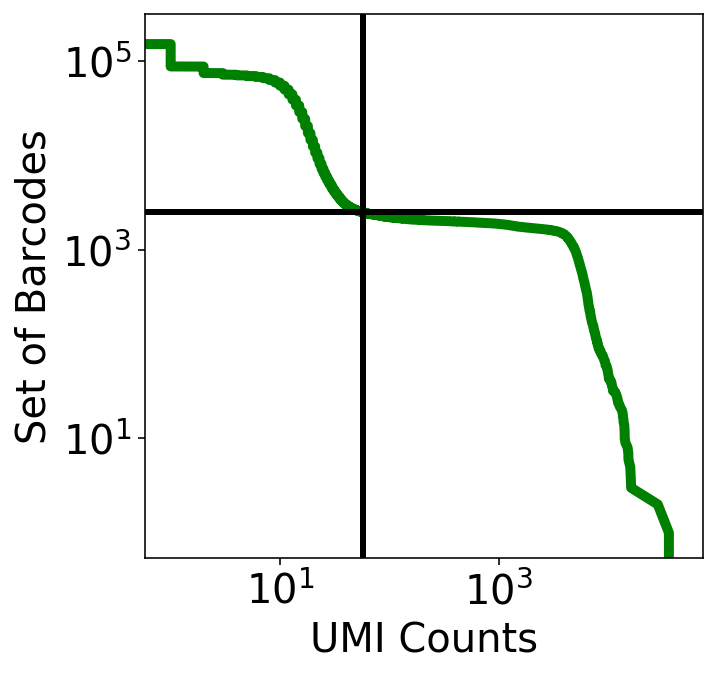

Cells were filtered down to 2500 with at least 57.0 UMIs


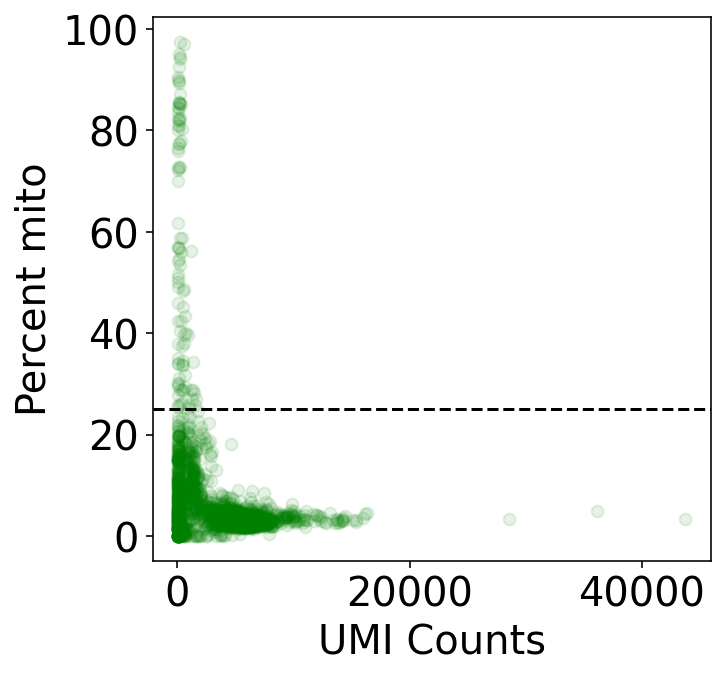

We select 25 % as the mitochondrial content threshold


In [ ]:

expected_num_cells = 2500#@param {type:"integer"}
knee = np.sort(nd(results[sample_id[samp_n]].X.sum(axis=1)))[::-1]

fig, ax = plt.subplots(figsize=(5, 5))

x = knee
y = range(len(knee))

ax.loglog(x, y, linewidth=5, color="g")

ax.axvline(x=knee[expected_num_cells], linewidth=3, color="k")
ax.axhline(y=expected_num_cells, linewidth=3, color="k")

ax.set_xlabel("UMI Counts")
ax.set_ylabel("Set of Barcodes")

plt.show()

cell_threshold = knee[expected_num_cells]

results["cell_threshold" + sample_id[samp_n]] = knee[expected_num_cells]

print ("Cells were filtered down to " + str(expected_num_cells) + " with at least " + str(cell_threshold) + " UMIs")


mito_criteria = 25#@param {type:"integer"}
results["mito_criteria" + sample_id[samp_n]] = mito_criteria

fig, ax = plt.subplots(figsize=(5,5))


x = nd(results[sample_id[samp_n]].obs["cell_counts"][results[sample_id[samp_n]].obs["cell_counts"] > cell_threshold])
y = nd(results[sample_id[samp_n]].obs["percent_mito"][results[sample_id[samp_n]].obs["cell_counts"] > cell_threshold])

ax.scatter(x, y, color="green", alpha=0.1)

ax.axhline(y=mito_criteria, linestyle="--", color="k")


ax.set_xlabel("UMI Counts")
ax.set_ylabel("Percent mito")


plt.show()

print("We select " + str(mito_criteria) + " % as the mitochondrial content threshold")

# Filter matrix

In [ ]:
for i in range(no_samples):
  results[sample_id[i]].obs["pass_count_filter"] = results[sample_id[i]].obs["cell_counts"] > results["cell_threshold" + sample_id[i]]
  results[sample_id[i]].obs["pass_mito_filter"] = results[sample_id[i]].obs.percent_mito < results["mito_criteria" + sample_id[i]]
  results[sample_id[i]].var["pass_gene_filter"] = results[sample_id[i]].var["n_cells"] > gene_threshold

  cell_mask = np.logical_and(results[sample_id[i]].obs["pass_count_filter"].values, results[sample_id[i]].obs["pass_mito_filter"].values)
  gene_mask = results[sample_id[i]].var["pass_gene_filter"].values

  print("Current Shape: {:,} cells x {:,} genes".format(results[sample_id[i]].shape[0], results[sample_id[i]].shape[1]))
  print("    New shape: {:,} cells x {:,} genes".format(cell_mask.sum(), gene_mask.sum()))
  results["data_" + sample_id[i]] = results[sample_id[i]][cell_mask, gene_mask]

Current Shape: 173,421 cells x 60,623 genes
    New shape: 2,401 cells x 23,772 genes


# Anotate and write the Anndata object

In [ ]:
for i in range(no_samples):


  results["data_" + sample_id[i]].uns["database_id"] = database_id[samp_n]

  results["data_" + sample_id[i]].uns["tissue"] = tissue[samp_n]

  results["data_" + sample_id[i]].uns["cell_type"] = cell_type[samp_n]

  results["data_" + sample_id[i]].uns["sample_id"] = sample_id[samp_n]

  results["data_" + sample_id[i]].uns["condition"] = condition[samp_n]

  results["data_" + sample_id[i]].uns["species"] = species[samp_n]

  results["data_" + sample_id[i]].uns["technology"] = technology[samp_n]

  results["data_" + sample_id[i]].uns["paper"] = paper[samp_n]

  results["data_" + sample_id[i]].uns["figure"] = figure[samp_n]


%cd /content

for i in range(no_samples):

  results["data_" + sample_id[i]].write("result" + sample_id[i])

Trying to set attribute `.uns` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


/content


... storing 'gene_name' as categorical
